In [138]:
from sklearn import svm,metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier #분류
from sklearn.neighbors import KNeighborsRegressor  #회귀 예측
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import oracledb
import random
import glob,os.path,re
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [139]:
# numpy의 구조로 변환
perch_length=np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight= np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [140]:
# perch_length= [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
#      21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
#      22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
#      27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
#      36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
#      40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

# perch_weight= [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
#      110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
#      130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
#      197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
#      514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
#      820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
#      1000.0, 1000.0]

# df = pd.DataFrame([perch_length, perch_weight])
# df = df.T
# df

Text(0, 0.5, '무게')

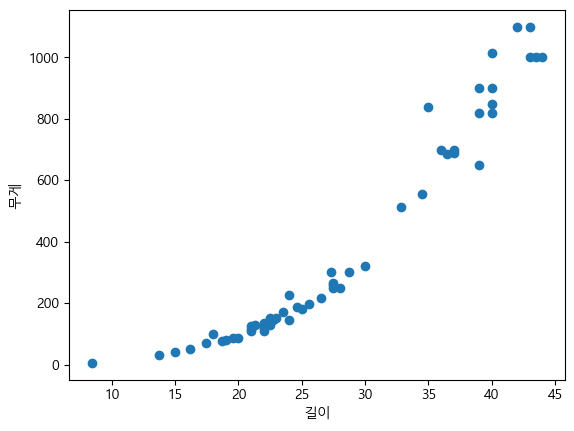

In [141]:
# 산점도로 출력하시오
# x축은 길이 df[0], y축은 무게 df[1]
plt.scatter(perch_length,perch_weight)
# plt.scatter(df[0],df[1])
plt.xlabel('길이')
plt.ylabel('무게')
 

1.데이터 전처리
2.데이터 학습 시키기
3.데이터 예측하기
4.정답률 구하기

In [142]:
# 머신러닝 구현
# 1. 데이터 전처리 - Nan, 0, 단위 처리, 훈련세트, 테스트세트 분리
# train_input, test_input, train_target, test_target = train_test_split(
#     df[0],df[1]
# )
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight
)
train_input 

array([24. , 44. , 21. , 36. , 23.5,  8.4, 25. , 34.5, 19. , 22.5, 15. ,
       22. , 40. , 39. , 21. , 27.5, 28. , 22. , 43. , 39. , 17.4, 43.5,
       37. , 18. , 22. , 22.5, 13.7, 20. , 22.7, 27.5, 24.6, 23. , 36.5,
       30. , 40. , 39. , 40. , 27.3, 43. , 35. , 42. , 16.2])

In [143]:
arr1 = np.array([1,2,3,4,5,6]) #numpy행렬로 변환
arr1.reshape(2,3)
arr1.reshape(-1,1) #행렬의 모양을 변경


array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [144]:
# [1,2,3,4]
# [[1],[2],[3],[4]]

arr1 = np.array([1,2,3,4])
arr1 = arr1.reshape(-1,1)
arr1

array([[1],
       [2],
       [3],
       [4]])

In [145]:
# 알고리즘 구현을 위한 2차원 행렬로 변경 (하나여서 바꿈. 2개 이상이면 안바꿔도 됨)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [146]:
train_input.shape
test_input.shape

(14, 1)

In [147]:
# 2. 데이터 학습시키기 (총 갯수 56, test 14, train 42)
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [148]:
# 4. 예측값 구하기
# 에측의 오차범위 - 평균 절대값 오차
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
# 무게 예측
print("예측값: ",predict)

예측값:  [121.  129.  129.  228.6 121.   92.  249.  249.  182.6 277.  620.2 808.
 101.  711. ]


In [149]:
# 예측한 값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print('오차범위: ',test_mean)

오차범위:  37.74285714285715


In [150]:
# 예측률 측정하기 - test_input 데이터 검증
score = knr.score(test_input,test_target)
print("예측률 : ",score)

예측률 :  0.9388876187830214


knn 회귀 분석을 통해 농어에 대한 무게를 예측하는 프로그램을 구현


In [151]:
# 실제 train 데이터의 예측률은 어느 정도 나오는 지 확인
score2 = knr.score(train_input,train_target)
print('train 예측률: ',score2)

train 예측률:  0.9801254646978276


그래프 구성

In [152]:
score = knr.score(test_input,test_target)
print("예측률 : ",score)
score2 = knr.score(train_input,train_target)
print('train 예측률: ',score2)

예측률 :  0.9388876187830214
train 예측률:  0.9801254646978276


In [153]:
# 이웃의 갯수를 축소: 5에서 3으로 변경
# 과소적합: n_neighbors를 줄임
# 과대적합: n_neighbors를 늘림
knr.n_neighbors = 3
# 데이터 훈련을 다시 시키기 
knr.fit(train_input,train_target)
# train 데이터 예측
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9833004824564052
0.9625352778117868


In [154]:
knr.score(test_input,test_target)

0.9625352778117868

In [155]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [156]:
len(perch_length)

56

In [157]:
arr= [[i] for i in range(5,45+1)] # x축의 좌표
arr


[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

In [158]:
np.arange(4,45)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44])

In [159]:
np.arange(5,45).reshape(-1,1)

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

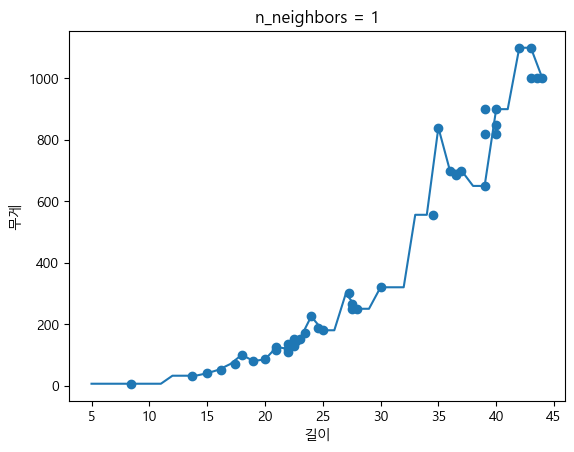

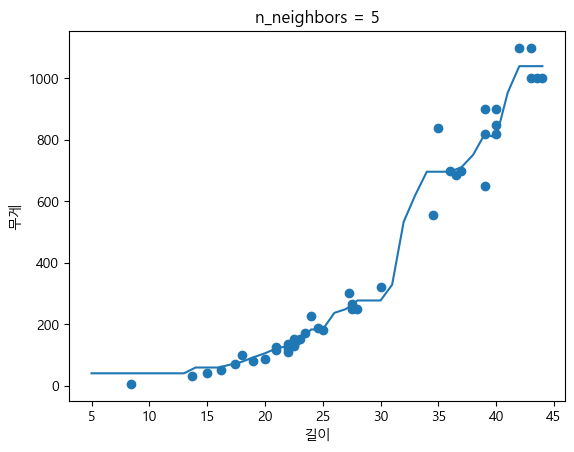

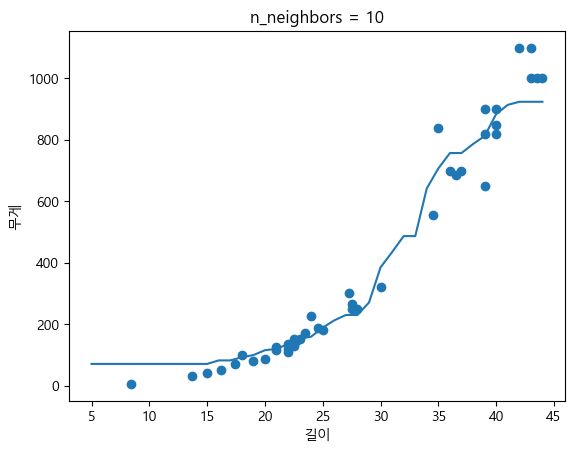

In [164]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)  #5,6,7..45
for n in [1,5,10]: #n_neighbors = 1,5,10 예측률을 그래프로 표시
    knr.n_neighbors = n
    knr.fit(train_input,train_target)
    # 배열로 만든 길이를 가지고 예측무게를 산출
    predict = knr.predict(x)
    # 훈련세트의 값을 먼저 출력
    plt.scatter(train_input,train_target)
    plt.plot(x,predict)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()